In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline 

In [2]:
df=pd.read_csv(r"C:\Users\sarkar\Desktop\final\all about projects\churn prediction\insurance churn prediction\data\Insurance_Churn_ParticipantsData\Train.csv")

In [3]:
dffeature=df.copy()

In [4]:
dff=dffeature.drop(['feature_7','feature_10'],axis=1)

In [5]:
dff.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_8', 'feature_9', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'labels'],
      dtype='object')

# Vif number (Multicollinearity) 

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'Y'
print(get_VIF(dffeature,target))

const         43.836158
feature_0      1.281665
feature_1      1.031989
feature_2      1.040622
feature_3      1.198913
feature_4      1.060339
feature_5      3.862598
feature_6      1.575020
feature_7      1.047895
feature_8      1.223393
feature_9      1.067219
feature_10     1.011993
feature_11     1.207391
feature_12     1.023943
feature_13     1.334837
feature_14     1.251574
feature_15     4.212837
labels         1.269477
dtype: float64


# As the model is weak removing the values above 2.5 


In [7]:
final_features=dff.drop(['feature_5','feature_15'],axis=1)

In [8]:
final_features.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_8', 'feature_9', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'labels'],
      dtype='object')

# Removing Outliers 

In [9]:
#feature_0,feature_1,feature_3

In [10]:
#feature_0
upper_limit=final_features.feature_0.mean()+3*final_features.feature_0.std()
lower_limit=final_features.feature_0.mean()-3*final_features.feature_0.std()
out=final_features[(final_features.feature_0>upper_limit)|(final_features.feature_0<lower_limit) ]
out

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_6,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,labels
52,3.396271,0.437059,1.104681,-0.680179,-0.246560,4.957714,0,0,0,0,0,10,0
102,3.490445,-0.240176,-0.577529,-0.633582,-0.569351,-0.251940,0,1,0,0,1,1,0
241,3.019575,-0.185984,0.864365,2.445732,-0.569351,1.050473,1,0,0,0,0,0,1
526,3.113749,0.398304,1.104681,-0.334581,-0.246560,0.182198,1,2,0,0,0,4,0
584,3.207923,0.528036,-0.457371,1.486601,-0.569351,-0.251940,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32700,4.997228,-0.042129,-1.538792,-0.179257,-0.569351,-0.251940,0,1,0,0,0,7,0
33153,3.490445,4.217687,1.224839,-0.420010,-0.569351,0.182198,1,0,0,0,0,10,0
33157,3.396271,0.282694,-0.697687,0.414860,-0.246560,0.182198,1,0,0,0,1,1,0
33540,3.207923,11.746428,-0.577529,0.958497,-0.569351,-0.251940,0,0,0,0,0,3,0


In [11]:
final_features.drop(index=out.index,axis=0,inplace=True)

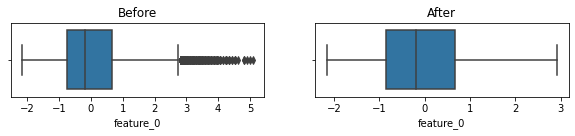

In [26]:
fig = plt.figure(figsize=(10,3))

plt.subplot(2, 2, 1)
sns.boxplot(df.feature_0)
plt.title("Before")

plt.subplot(2, 2, 2)
sns.boxplot(final_features.feature_0)
plt.title("After")


plt.show()

In [14]:
#feature_1

In [16]:
upper_limit=final_features.feature_1.mean()+3*final_features.feature_1.std()
lower_limit=final_features.feature_1.mean()-3*final_features.feature_1.std()
out=final_features[(final_features.feature_1>upper_limit)|(final_features.feature_1<lower_limit) ]


In [17]:
final_features.drop(index=out.index,axis=0,inplace=True)

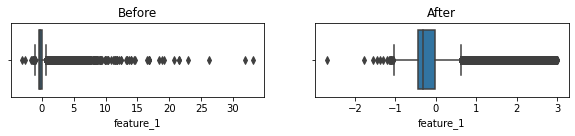

In [25]:
fig = plt.figure(figsize=(10,3))

plt.subplot(2, 2, 1)
sns.boxplot(df.feature_1)
plt.title("Before")

plt.subplot(2, 2, 2)
sns.boxplot(final_features.feature_1)
plt.title("After")


plt.show()

In [20]:
#feature_3
upper_limit=final_features.feature_3.mean()+3*final_features.feature_3.std()
lower_limit=final_features.feature_3.mean()-3*final_features.feature_3.std()
out=final_features[(final_features.feature_3>upper_limit)|(final_features.feature_3<lower_limit) ]
final_features.drop(index=out.index,axis=0,inplace=True)

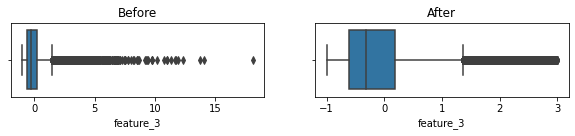

In [24]:
fig = plt.figure(figsize=(10,3))

plt.subplot(2, 2, 1)
sns.boxplot(df.feature_3)
plt.title("Before")

plt.subplot(2, 2, 2)
sns.boxplot(final_features.feature_3)
plt.title("After")


plt.show()


# ---------------------------------------------------------------------------------------------------------------

In [27]:
from sklearn.model_selection import train_test_split


In [29]:
X=final_features.drop("labels",axis=1)
y=final_features.labels

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fitting model 

In [31]:
from sklearn.linear_model import LogisticRegression

In [34]:
model1=LogisticRegression()

In [35]:
model1.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred=model1.predict(X_train)

# Evaluation 

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [39]:
def performa(y,y_pred):
    confusion=confusion_matrix(y, y_pred)
    accuracy=accuracy_score(y, y_pred)
    precision=precision_score(y, y_pred)
    recall=recall_score(y, y_pred)
    ROC_AUC=roc_auc_score(y, y_pred)
    print("confusion_matrix\n",confusion)
    print("accuracy: ",accuracy)
    print("precision: ",precision)
    print("recall: ",recall)
    print("ROC_AUC: ",ROC_AUC)

# Model score Train 

In [41]:
performa(y_train,y_pred)

confusion_matrix
 [[19046   393]
 [ 1805   441]]
accuracy:  0.8986396126354623
precision:  0.5287769784172662
recall:  0.19634906500445237
ROC_AUC:  0.588065987824002


# Test 

In [42]:
ytest_pred=model1.predict(X_test)

In [44]:
performa(y_test,ytest_pred)

confusion_matrix
 [[9420  170]
 [ 872  220]]
accuracy:  0.9024527242089496
precision:  0.5641025641025641
recall:  0.20146520146520147
ROC_AUC:  0.5918692013582525


# Cross validation 

In [45]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, y_train,cv=5).mean()

0.8986857274613789

In [54]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=5).mean()

0.901984475418829

In [55]:
accuracy=[0.9024527242089496,0.8986396126354623]
precision=[0.5641025641025641,0.5287769784172662]
recall=[0.20146520146520147,0.19634906500445237]
ROC=[0.5918692013582525,0.588065987824002]
cross_val=[0.901984475418829,0.8986857274613789]
df_final_performa=pd.DataFrame({"accuracy":accuracy,
                               "precision":precision,
                               "recall":recall,
                               "ROC":ROC,
                               "cross_val":cross_val},index={"test","train"})

In [56]:
df_final_performa

,accuracy,precision,recall,ROC,cross_val
test,0.902453,0.564103,0.201465,0.591869,0.901984
train,0.898640,0.528777,0.196349,0.588066,0.898686
